### Mandelbrot Set

In [1]:
# import Packages
using CairoMakie

In [3]:
# Escape time Mandelbrot function
function mandelbrot(c_real, c_imag, max_iter)
    """
    Compute the escape time for a given point in the Mandelbrot set.
    
    Args:
        c_real (float): The real part of the complex constant c.
        c_imag (float): The imaginary part of the complex constant c.
        max_iter (int): Maximum number of iterations before the point is assumed to be in the set.
    
    Returns:
        int: The escape time, i.e., the number of iterations before the magnitude of z exceeds 2.
             If the magnitude does not exceed 2 after max_iter iterations, it returns max_iter.
    """
    z_real = 0.0
    z_imag = 0.0
    for n in 1:max_iter
        z_real2 = z_real * z_real
        z_imag2 = z_imag * z_imag
        if z_real2 + z_imag2 > 4.0
            return n  # The point escaped, return the number of iterations
        end
        z_imag = 2.0 * z_real * z_imag + c_imag
        z_real = z_real2 - z_imag2 + c_real
    end
    return max_iter  # The point is assumed to be in the set, return max_iter
end

# Compute the escape time Mandelbrot set
function mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    """
    Compute the Mandelbrot set for a given region and resolution.
    
    Args:
        xmin (float): The minimum value of the real part of the complex plane.
        xmax (float): The maximum value of the real part of the complex plane.
        ymin (float): The minimum value of the imaginary part of the complex plane.
        ymax (float): The maximum value of the imaginary part of the complex plane.
        width (int): The number of points along the real axis (resolution in x direction).
        height (int): The number of points along the imaginary axis (resolution in y direction).
        max_iter (int): Maximum number of iterations for determining if a point is in the set.
    
    Returns:
        Array{Int}: A 2D array where each element corresponds to the escape time for a point in the 
        complex plane.
    """
    r = LinRange(xmin, xmax, width)
    i = LinRange(ymin, ymax, height)
    m = zeros(Int, height, width)
    
    for j in 1:height
        for k in 1:width
            m[j, k] = mandelbrot(r[k], i[j], max_iter)
        end
    end
    return m
end

# Histogram coloring method
function histogram_coloring(mandelbrot_matrix, max_iter)
    """
    Apply histogram-based coloring to the Mandelbrot set escape times for visualization.
    
    Args:
        mandelbrot_matrix (Array{Int}): A 2D array where each element represents the escape time at a point.
        max_iter (int): The maximum number of iterations used in the Mandelbrot set computation.
    
    Returns:
        Array{Float64}: A 2D array of normalized values between 0 and 1, suitable for coloring.
    """
    h, w = size(mandelbrot_matrix)
    histogram = zeros(Int, max_iter + 1)
    
    # Compute the histogram of escape times
    for j in 1:h
        for k in 1:w
            escape_time = mandelbrot_matrix[j, k]
            histogram[escape_time + 1] += 1
        end
    end
    
    # Normalize the histogram to get cumulative distribution
    cumulative_histogram = cumsum(histogram) / (h * w)
    
    # Apply histogram coloring based on the cumulative distribution
    colored_matrix = zeros(Float64, h, w)
    for j in 1:h
        for k in 1:w
            escape_time = mandelbrot_matrix[j, k]
            colored_matrix[j, k] = cumulative_histogram[escape_time + 1]
        end
    end
    
    return colored_matrix
end

histogram_coloring (generic function with 1 method)

In [8]:
# Plot the results
function plot_mandelbrot_comparison(xmin, xmax, ymin, ymax, width, height)
    """
    Plot a comparison of the Mandelbrot set using the escape time method and histogram coloring.
    
    Args:
        xmin (float): The minimum value of the real part of the complex plane.
        xmax (float): The maximum value of the real part of the complex plane.
        ymin (float): The minimum value of the imaginary part of the complex plane.
        ymax (float): The maximum value of the imaginary part of the complex plane.
        width (int): The number of points along the real axis (resolution in x direction).
        height (int): The number of points along the imaginary axis (resolution in y direction).
        
    Returns:
        None: Displays a figure with two rows of images for different iteration counts.
              The top row shows the escape time results and the bottom row shows the histogram coloring.
    """
    # Set global theme
    set_theme!(theme_latexfonts())
    fig = Figure(size = (1500, 1000), fontsize = 25)  # Create a figure with a specific size
    
    # Maximum iterations for comparison
    max_iters = [50000, 500, 50]
    
    for (idx, max_iter) in enumerate(max_iters)
        # Compute the Mandelbrot set using the escape time algorithm (top row)
        escape_time_m = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
        ax1 = Axis(fig[1, idx], title="Escape Time: $max_iter")  # Create a subplot axis
        hidedecorations!(ax1)  # Hide axis decorations like ticks and labels
        image!(ax1, escape_time_m', colormap=:inferno)  # Plot the escape time matrix
        
        # Apply histogram coloring to the escape time results (bottom row)
        hist_coloring_m = histogram_coloring(escape_time_m, max_iter)
        ax2 = Axis(fig[2, idx], title="Histogram Coloring: $max_iter")  # Create another axis for coloring
        hidedecorations!(ax2)  # Hide decorations on the second axis
        image!(ax2, hist_coloring_m', colormap=:inferno)  # Plot the colored matrix
    end
    
    display(fig)  # Display the figure
end

plot_mandelbrot_comparison (generic function with 1 method)

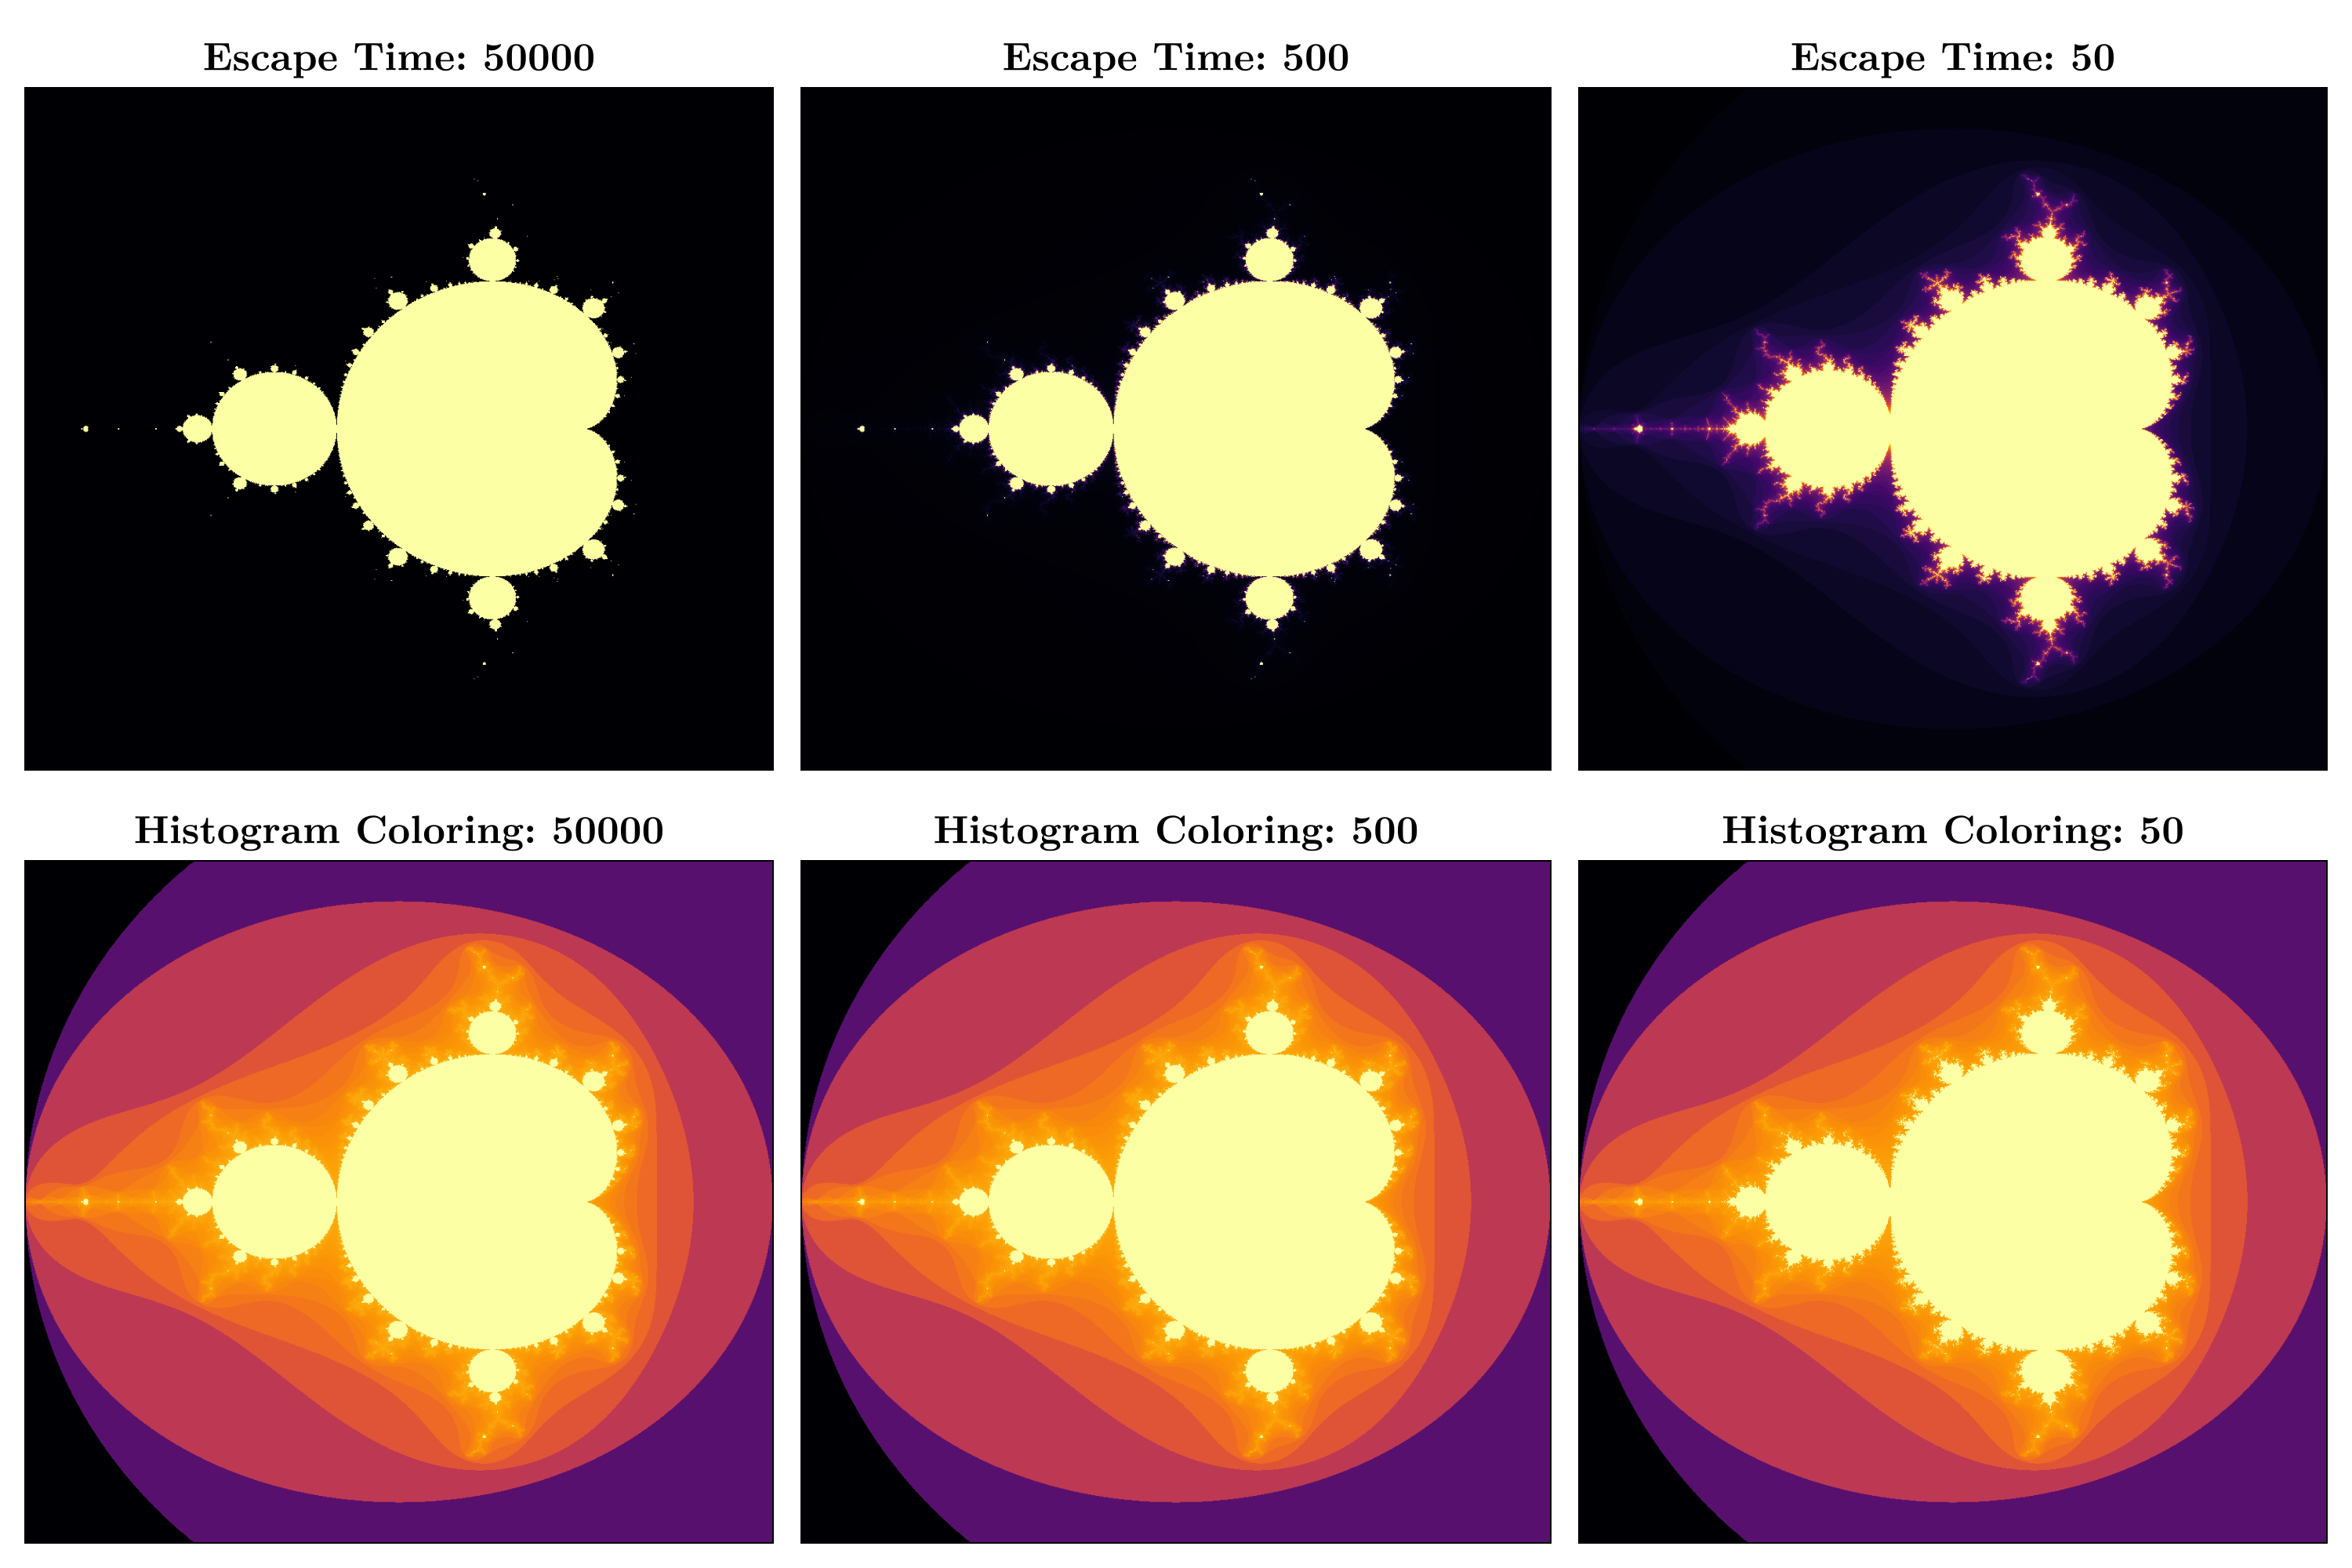

CairoMakie.Screen{IMAGE}


In [9]:
# Example usage to plot Mandelbrot comparison
plot_mandelbrot_comparison(-2.0, 1.0, -1.5, 1.5, 1000, 1000)